In [177]:
import pandas as pd
import numpy as np
import pylab
from IPython.display import Image, display
import matplotlib.pyplot as plt
import import_ipynb
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression
from PsychrometricProperty import W_ptr, Tdp_ptr, h_ptr, v_ptr, W_ptb,RH_ptb,Tdp_ptb,h_ptb,v_ptb,Tdp_ptW,h_ptw,RH_ptw,W_pth,RH_pth,T_pwh

In [32]:
data_val = DataFrame()
data_val = pd.read_csv("Carrier_24AHA424A30.csv")  # open works

IDB = np.array(data_val['IDB'])
ODB = np.array(data_val['ODB'])
IWB = np.array(data_val['IWB'])
Q_tot = np.array(data_val['Q_tot'])
Q_sen = np.array(data_val['Q_sens'])
W = np.array(data_val['W'])
SHR = np.array(data_val['SHR'])

df = pd.DataFrame({
    'IDB[F]': IDB,
    'ODB[F]': ODB,
    'IWB[F]': IWB,
    'Q_tot[Mbtu/hr]': Q_tot,
    'Q_sen[Mbtu/hr]': Q_sen,
    'Power [kW]': W,
    'SHR [-]': np.round(SHR, 2)
})

# Print the table
print(df.to_string(index=False))


 IDB[F]  ODB[F]  IWB[F]  Q_tot[Mbtu/hr]  Q_sen[Mbtu/hr]  Power [kW]  SHR [-]
     80      75      72           55.79           31.25        3.38     0.56
     80      75      67           50.98           39.68        3.35     0.78
     80      75      63           47.47           38.04        3.32     0.80
     80      75      62           47.80           47.80        3.32     1.00
     80      75      57           47.74           47.74        3.32     1.00
     80      85      72           53.16           30.32        3.69     0.57
     80      85      67           48.62           38.75        3.65     0.80
     80      85      63           45.30           37.12        3.63     0.82
     80      85      62           45.99           45.99        3.63     1.00
     80      85      57           45.93           45.93        3.63     1.00
     80      95      72           50.36           29.34        4.04     0.58
     80      95      67           46.10           37.76        4.01     0.82

In [33]:
IDB_wet = IDB[SHR < 1]
ODB_wet = ODB[SHR < 1]
IWB_wet = IWB[SHR < 1]
Q_tot_wet = Q_tot[SHR < 1]
Q_sen_wet = Q_sen[SHR < 1]
W_wet = W[SHR < 1]
SHR_wet = SHR[SHR < 1]

df = pd.DataFrame({
    'IDB[F]': IDB_wet,
    'ODB[F]': ODB_wet,
    'IWB[F]': IWB_wet,
    'Q_tot[Mbtu/hr]': Q_tot_wet,
    'Q_sen[Mbtu/hr]': Q_sen_wet,
    'Power [kW]': W_wet,
    'SHR [-]': np.round(SHR_wet, 2)
})

# Print the table
print(df.to_string(index=False))

 IDB[F]  ODB[F]  IWB[F]  Q_tot[Mbtu/hr]  Q_sen[Mbtu/hr]  Power [kW]  SHR [-]
     80      75      72           55.79           31.25        3.38     0.56
     80      75      67           50.98           39.68        3.35     0.78
     80      75      63           47.47           38.04        3.32     0.80
     80      85      72           53.16           30.32        3.69     0.57
     80      85      67           48.62           38.75        3.65     0.80
     80      85      63           45.30           37.12        3.63     0.82
     80      95      72           50.36           29.34        4.04     0.58
     80      95      67           46.10           37.76        4.01     0.82
     80      95      63           42.98           36.13        3.98     0.84
     80     105      72           47.31           28.27        4.45     0.60
     80     105      67           43.37           36.69        4.42     0.85
     80     105      63           40.45           35.06        4.39     0.87

#### Correlating System Performance
Cooling capacity and power consumption can be correlated for fixed air flow and a wet coil:
$$\frac{\dot{W}_c}{\dot{W}_{c,rated}} = a_1 + a_2X + a_3X^2 + a_4Y + a_5Y^2 + a_6XY$$
$$\frac{\dot{Q}_c}{\dot{Q}_{c,rated}} = b_1 + b_2X + b_3X^2 + b_4Y + b_5Y^2 + b_6XY$$
where:
$$X = \frac{T_{e,wb,i}}{T_{e,wb,i,rated}}; Y = \frac{T_{c,i}}{T_{c,i,rated}}$$

$T_{e,wb,i} = $ Wetbulb temperature of air entering evaporator (indoor temperature for AC mode)\
$T_{c,i} = $ Drybulb temperature of air entering condenser (outdoor temperature for AC mode)

In [34]:
IDB_rated = IDB_wet[7]
ODB_rated = ODB_wet[7]
IWB_rated = IWB_wet[7]
Q_tot_rated = Q_tot_wet[7]
Q_sen_rated = Q_sen_wet[7]
W_rated = W_wet[7]
SHR_rated = SHR_wet[7]

df = pd.DataFrame({
    'IDB[F]': [IDB_rated],
    'ODB[F]': [ODB_rated],
    'IWB[F]': [IWB_rated],
    'Q_tot[Mbtu/hr]': [Q_tot_rated],
    'Q_sen [Mbtu/hr]': [Q_sen_rated],
    'Power [kW]': [W_rated],
    'SHR [-]': [SHR_rated]
})

# Print the table
print(df.to_string(index=False))

 IDB[F]  ODB[F]  IWB[F]  Q_tot[Mbtu/hr]  Q_sen [Mbtu/hr]  Power [kW]  SHR [-]
     80      95      67            46.1            37.76        4.01 0.819089


In [170]:
X = IWB_wet/IWB_rated
Y = ODB_wet/ODB_rated
W_ratio = W_wet/W_rated
Q_ratio = Q_tot_wet/Q_tot_rated
df = pd.DataFrame({
    'IDB[F]': IDB_wet,
    'ODB[F]': ODB_wet,
    'IWB[F]': IWB_wet,
    'Q_tot[Mbtu/hr]': Q_tot_wet,
    'Power [kW]': W_wet,
    'SHR': SHR_wet,
    'X': X,
    'Y': Y,
    'W/W_rated': W_ratio,
    'Q/Q_rated': Q_ratio
})
# Print the table
print(df.to_string(index=False))

 IDB[F]  ODB[F]  IWB[F]  Q_tot[Mbtu/hr]  Power [kW]      SHR        X        Y  W/W_rated  Q/Q_rated
     80      75      72           55.79        3.38 0.560136 1.074627 0.789474   0.842893   1.210195
     80      75      67           50.98        3.35 0.778344 1.000000 0.789474   0.835411   1.105857
     80      75      63           47.47        3.32 0.801348 0.940299 0.789474   0.827930   1.029718
     80      85      72           53.16        3.69 0.570354 1.074627 0.894737   0.920200   1.153145
     80      85      67           48.62        3.65 0.796997 1.000000 0.894737   0.910224   1.054664
     80      85      63           45.30        3.63 0.819426 0.940299 0.894737   0.905237   0.982646
     80      95      72           50.36        4.04 0.582605 1.074627 1.000000   1.007481   1.092408
     80      95      67           46.10        4.01 0.819089 1.000000 1.000000   1.000000   1.000000
     80      95      63           42.98        3.98 0.840624 0.940299 1.000000   0.992519  

#### Step 1: Determine the cooling capacity and power consumption coefficients


In [36]:
# Build feature matrix
features = np.column_stack((
    np.ones_like(X),      
    X,                   
    X**2,             
    Y,                
    Y**2,          
    X * Y             
))

# Fit linear regression (intercept already included)
model = LinearRegression(fit_intercept=False)
model.fit(features, W_ratio)
# Output coefficients
coeffs_1 = model.coef_
for i, a in enumerate(coeffs_1, start=1):
    print(f"a{i} = {a:.6f}")

a1 = 0.589344
a2 = 0.192692
a3 = -0.051826
a4 = -0.398893
a5 = 0.643035
a6 = 0.024906


In [37]:
# Fit linear regression (intercept already included)
model = LinearRegression(fit_intercept=False)
model.fit(features, Q_ratio)
# Output coefficients
coeffs_2 = model.coef_
for i, b in enumerate(coeffs_2, start=1):
    print(f"b{i} = {b:.6f}")

b1 = 0.021922
b2 = 0.621706
b3 = 0.682529
b4 = 0.711130
b5 = -0.223038
b6 = -0.813769


In [38]:
def Prediction(W_rated, Q_rated, a, b, IWB,IWB_rated, ODB,ODB_rated):
    X = IWB/IWB_rated
    Y = ODB/ODB_rated
    W_pred = (a[0] + a[1] * X + a[2]*X**2 + a[3]*Y + a[4]*Y**2 + a[5]*X*Y) * W_rated
    Q_pred = (b[0] + b[1] * X + b[2]*X**2 + b[3]*Y + b[4]*Y**2 + b[5]*X*Y) * Q_rated

    return W_pred,Q_pred

In [39]:
n_len = 18
W_pred_wet = np.zeros(n_len) 
Q_tot_pred_wet = np.zeros(n_len) 
for i in range (n_len):
    W_pred_wet[i],Q_tot_pred_wet[i] = Prediction(W_rated,Q_tot_rated,coeffs_1,coeffs_2,IWB_wet[i],IWB_rated,ODB_wet[i],ODB_rated)

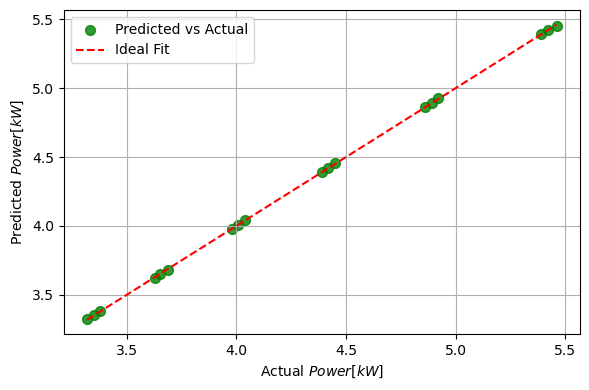

In [171]:

plt.figure(figsize=(6,4))
plt.scatter(W_wet, W_pred_wet, 
            color='green', 
            s=50,           # point size
            marker='o',      # square
            alpha=0.8,
            label='Predicted vs Actual')
plt.plot([min(W_wet), max(W_wet)],
         [min(W_wet), max(W_wet)],
         color='red', linestyle='--', label='Ideal Fit')

plt.xlabel('Actual $Power [kW]$')
plt.ylabel('Predicted $Power [kW]$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

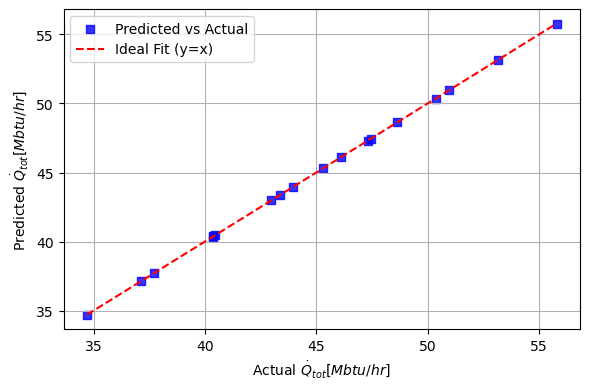

In [172]:
plt.figure(figsize=(6,4))
plt.scatter(Q_tot_wet, Q_tot_pred_wet, 
            color='blue', 
            s=30,           # point size
            marker='s',      # square
            alpha=0.8,
            label='Predicted vs Actual')
plt.plot([min(Q_tot_wet), max(Q_tot_wet)],
         [min(Q_tot_wet), max(Q_tot_wet)],
         color='red', linestyle='--', label='Ideal Fit (y=x)')

plt.xlabel('Actual $\dot{Q}_{tot} [Mbtu/hr]$')
plt.ylabel('Predicted $\dot{Q}_{tot} [Mbtu/hr]$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 2: Determine the following for each data point from the manufacturer
Evaporator air inlet enthalpy (Determined from an energy balance):
$$h_{eao} = h_{eai} - \frac{\dot{Q}_{tot}}{\dot{m}_{ea}}$$
$$T_{eao} = T_{eai} - \frac{\dot{Q}_{tot}*SHR}{\dot{m}_{ea}c_{p,a}}$$
where $c_{p,a} = 0.240 Btu/lbm-°F$

In [173]:
P_atm = 14.7
c_p = 0.24
V_dot = 1800 #cfm
h_eai = np.zeros(n_len)
h_eao = np.zeros(n_len)  
T_eao = np.zeros(n_len)  
v_eai = np.zeros(n_len)
m_ea = np.zeros(n_len)
for i in range (n_len):
    h_eai[i] = h_ptb(P_atm, IDB_wet[i],IWB_wet[i])
    v_eai[i] = v_ptb(P_atm, IDB_wet[i],IWB_wet[i])
    m_ea[i] = V_dot/v_eai[i]*60
    h_eao[i] = h_eai[i] - Q_tot_pred_wet[i]*1000/m_ea[i]
    T_eao[i] = IDB_wet[i] - SHR_wet[i]*(h_eai[i]-h_eao[i])/0.24

df = pd.DataFrame({
    'IDB[F]': IDB_wet,
    'ODB[F]': ODB_wet,
    'IWB[F]': IWB_wet,
    'Q_tot[Mbtu/hr]': Q_tot_wet,
    'Power [W]': W_wet,
    'SHR': SHR_wet,
    'T_eao [F]': T_eao,
    'h_eai[Btu/lb-a]': h_eai,
    'h_eao[Btu/lb-a]': h_eao
})
# Print the table
print(df.to_string(index=False))

 IDB[F]  ODB[F]  IWB[F]  Q_tot[Mbtu/hr]  Power [W]      SHR  T_eao [F]  h_eai[Btu/lb-a]  h_eao[Btu/lb-a]
     80      75      72           55.79       3.38 0.560136  63.208198        35.673543        28.478806
     80      75      67           50.98       3.35 0.778344  58.803395        31.442905        24.907000
     80      75      63           47.47       3.32 0.801348  59.801537        28.392055        22.342711
     80      85      72           53.16       3.69 0.570354  63.703488        35.673543        28.816108
     80      85      67           48.62       3.65 0.796997  59.283325        31.442905        25.204486
     80      85      63           45.30       3.63 0.819426  60.254389        28.392055        22.608804
     80      95      72           50.36       4.04 0.582605  64.243564        35.673543        29.182793
     80      95      67           46.10       4.01 0.819089  59.824039        31.442905        25.531177
     80      95      63           42.98       3.98 0.84

#### Step 3: Determine the apparatus dew point temperature ($T_{SDP}$) and enthalpy($h_{SDP}$)

The Apparatus Dew Point (ADP) represents the effective coil surface temperature at which the air would become saturated if cooled along the same path. On a psychrometric chart, it is the point where the extended line connecting the entering and leaving air conditions intersects the saturation curve (100% RH line). While not necessarily the actual surface temperature of the coil, the ADP reflects the idealized temperature that yields the same thermodynamic outcome.\
In a cooling coil, the air does not come fully into contact with the coil surface and, therefore, is not cooled entirely to the coil’s ADP temperature. To account for this, the bypass factor method is applied, recognizing that a portion of the air bypasses direct contact with the coil surface.
$$BF = \frac{h_{eao}-h_{ADP}}{h_{eai}-h_{ADP}}$$
$$BF = \frac{T_{eao}-T_{ADP}}{T_{eai}-T_{ADP}}$$
thus:
$$\frac{h_{eao}-h_{ADP}}{h_{eai}-h_{ADP}} = \frac{T_{eao}-T_{ADP}}{T_{eai}-T_{ADP}}$$
and
$$h_{ADP} = 𝐸𝑛𝑡ℎ𝑎𝑙𝑝𝑦(T_{ADP}, RH=1, P=1atm)$$


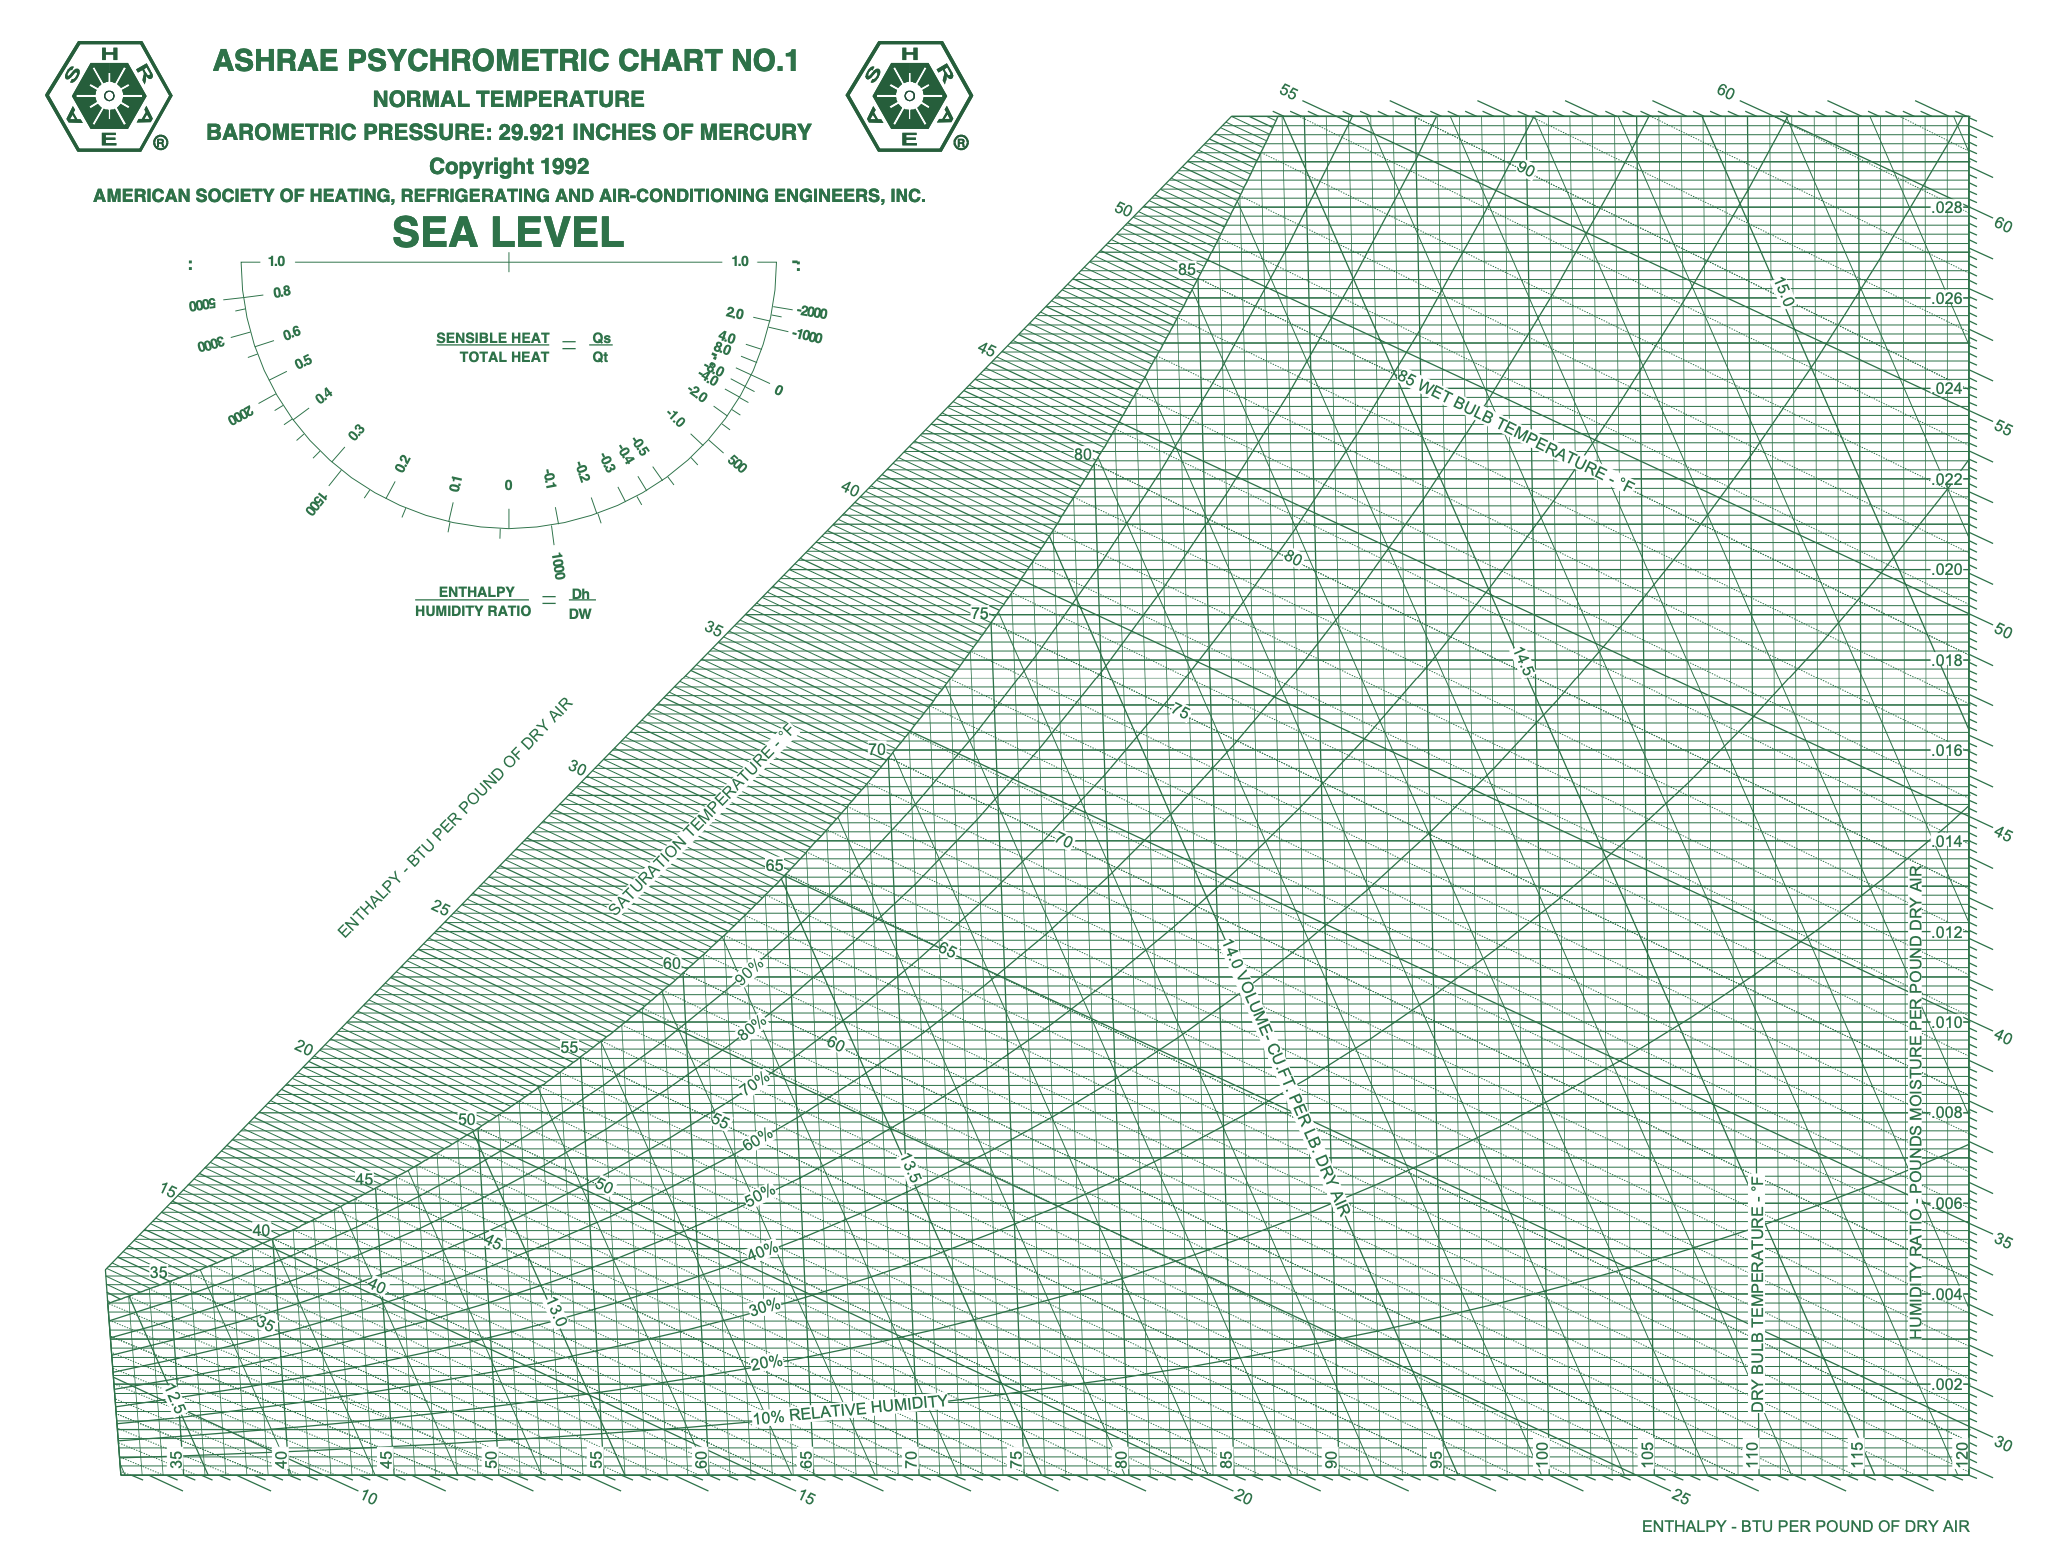

In [178]:
display(Image(filename='ASHRAEPsychrometricChart.jpg')) 

In [149]:
def ADP_temp(T_eai, T_eao, h_eai, h_eao):
    """
    Estimate the Apparatus Dew Point (ADP) temperature using bypass factor iteration.
    Inputs:
        T_eai   = entering air temperature [°F]
        T_eao   = leaving air temperature [°F]
        h_eai   = entering air enthalpy [Btu/lb_da]
        h_eao   = leaving air enthalpy [Btu/lb_da]
        P_atm   = atmospheric pressure [psia]
    Returns:
        T_ADP   = apparatus dew point temperature [°F]
    """
    T_ADP_guess = T_eao+0.01
    iter_count = 0
    P_atm = 14.7
    tol=1e-2
    max_iter=5000

    while iter_count < max_iter:
        BF = (T_eao - T_ADP_guess) / (T_eai - T_ADP_guess)
        h_ADP_1 = (h_eao - BF * h_eai) / (1 - BF)
        h_ADP_2 = h_ptr(P_atm, T_ADP_guess, 100)

        if abs(h_ADP_1 - h_ADP_2) < tol:
            return T_ADP_guess
        
        # Adjust guess
        T_ADP_guess -= 0.01
        iter_count += 1

    raise ValueError("ADP_temp: Iteration did not converge within max iterations.")

#### Step 4: Determine the evaporator NTU for each data point 
Find the average NTU using all of the wet coil data from the manufacturer
$$ Ntu = -\ln [\frac{T_{eao}-T_{ADDP}}{T_{eai}-T_{ADDP}}]$$


In [179]:
T_ADP = np.zeros(n_len)
h_ADP = np.zeros(n_len)
T_dp = np.zeros(n_len)
Ntu = np.zeros(n_len)
for i in range (n_len):

   T_ADP[i] = ADP_temp(IDB_wet[i], T_eao[i], h_eai[i], h_eao[i])
   h_ADP[i] = h_ptr(P_atm, T_ADP[i], 100)
   Ntu[i] = -np.log((T_eao[i] - T_ADP[i]) / (IDB_wet[i] - T_ADP[i]))

df = pd.DataFrame({
    'IDB': IDB_wet,
    'ODB': ODB_wet,
    'IWB': IWB_wet,
    'Q_tot': Q_tot_wet,
    'W': W_wet,
    'SHR': SHR_wet,
    'T_eao': T_eao,
    'T_ADP': T_ADP,
    'h_eai': h_eai,
    'h_eao': h_eao,
    'Ntu':Ntu
})
# Print the table
print(df.to_string(index=False))

print('The avearage Ntu value is:',np.mean(Ntu))

 IDB  ODB  IWB  Q_tot    W      SHR     T_eao     T_ADP     h_eai     h_eao      Ntu
  80   75   72  55.79 3.38 0.560136 63.208198 62.608198 35.673543 28.478806 3.366825
  80   75   67  50.98 3.35 0.778344 58.803395 56.793395 31.442905 24.907000 2.446302
  80   75   63  47.47 3.32 0.801348 59.801537 46.421537 28.392055 22.342711 0.920124
  80   85   72  53.16 3.69 0.570354 63.703488 63.053488 35.673543 28.816108 3.260845
  80   85   67  48.62 3.65 0.796997 59.283325 57.283325 31.442905 25.204486 2.429952
  80   85   63  45.30 3.63 0.819426 60.254389 47.384389 28.392055 22.608804 0.929892
  80   95   72  50.36 4.04 0.582605 64.243564 63.523564 35.673543 29.182793 3.130435
  80   95   67  46.10 4.01 0.819089 59.824039 57.804039 31.442905 25.531177 2.396813
  80   95   63  42.98 3.98 0.840624 60.777459 48.357459 28.392055 22.903975 0.935194
  80  105   72  47.31 4.45 0.597548 64.825564 64.025564 35.673543 29.578862 2.994133
  80  105   67  43.37 4.42 0.845976 60.416242 58.366242 31.442905

### Using the Model

##### Step 1: Select a set of operating conditions ($T_{ea,db,i},  T_{ea,wb,i}, T_{oa,db,i}$)
Calculate $h_{eai}$  and $v_{eai}$\
Determine the air mass flow rate

##### Step 2: Determine power consumption and cooling capacity
$$\dot{W}_c = (a_1 + a_2X + a_3X^2 + a_4Y + a_5Y^2 + a_6XY)*\dot{W}_{c,rated}$$
$$\dot{Q}_c = (b_1 + b_2X + b_3X^2 + b_4Y + b_5Y^2 + b_6XY)*\dot{Q}_{c,rated}$$
where:
$$X = \frac{T_{e,wb,i}}{T_{e,wb,i,rated}}; Y = \frac{T_{c,i}}{T_{c,i,rated}}$$

##### Step 3: Determine the evaporator outlet (supply air) conditions
Calculate the supply air enthalpy from an energy balance
$$h_{eao} = h_{eai} - \frac{\dot{Q}_{tot}}{\dot{m}_{ea}}$$
Calculate the apparatus dewpoint enthalpy based on the average NTU found during training
$$h_{ADP} = \frac{h_{eao}-h_{eai}*e^{-Ntu}}{1-e^{Ntu}}$$
$$T_{ADP} = Temperature (H=h_{ADP}, RH=1, P=1atm)$$
Calculate the evaporator air outlet (supply air) drybulb temperature
$$T_{eao}= (T_{eai}-T_{ADP})e^{-Ntu}+T_{ADP}$$

##### Step 4: Calculate the SHR
$$SHR = \frac{c_{p,a}(T_{eai}-T_{eao})}{h_{eai}-h_{eao}}$$
1) If $SHR<1$, the results are valid and the problem is done!
2) If $SHR>1$, increase $T_{ea,wb,i}$ (using the same inlet dry bulb temperature), repeat the analysis iteratively from Step 1 until the SHR = 1.0
 

